# Übung 3

**Gruppenname: TSRI**

- Christian Rene Thelen @cortex359
- Leonard Schiel @leo_paticumbum
- Marine Raimbault @Marine Raimbault
- Alexander Ivanets @sandrium

### In dieser Übung ...

... werden Sie explorative Datenanalyse (EDA) kennenlernen und Prinzipien guter Visualisierung einsetzen. Nebenbei werden Sie mit den Software-Bibliotheken vertrauter, die Sie für Ihre Data Science Arbeiten nutzen.

### 3.1 Summary Statistics

Sie haben in der Vorlesung gesehen, dass *Summary Statistics* hilfreich sind, um erste Informationen über einen Datensatz zu erhalten und zusammenzufassen. In dieser Aufgabe werden Sie diese Techniken anwenden und untersuchen.

* Arbeiten Sie mit der Bibliothek *pandas*, die Sie in der letzten Übung kennengelernt haben. Dabei wird es auch darum gehen, Ihre Pandas Fertigkeiten zu festigen und zu vertiefen. Nutzen Sie auch Suchmaschinen und die Dokumentation von Pandas online, um die Befehle für die verschiedenen unten geforderten Arbeitsschritte herauszufinden.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/mysterious_data.csv).



**Ihre Aufgaben**

(1) Importieren Sie die oben angegebene Datei mithilfe von Pandas. Interpretieren Sie dabei die erste Spalte der CSV-Datei als Index. **Bitte visualisieren Sie die Daten zunächst nicht**! Zur Visualisierung kommen Sie noch im Schritt (6) dieser Übung.

In [604]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("mysterious_data.csv", index_col="dataset")
df.head()

,x,y
dataset,,
mystery,55.38,97.18
mystery,51.54,96.03
mystery,46.15,94.49
mystery,42.82,91.41
mystery,40.77,88.33


(2) Ihr Index enthält die Bezeichnung verschiedener Datensätze. Wie viele verschiedenen Datensätze enthalten Ihre Daten und wie heißen diese? (kurze Angabe bzw. Ausgabe genügt)

In [605]:
print(f"Es sind {df.value_counts('dataset').size} verschiedene Datensätze enthalten:")
print(df.value_counts("dataset"))

Es sind 13 verschiedene Datensätze enthalten:
dataset
away          142
bullseye      142
circle        142
dots          142
h_lines       142
high_lines    142
mystery       142
slant_down    142
slant_up      142
star          142
v_lines       142
wide_lines    142
x_shape       142
Name: count, dtype: int64


(3) Wie heißen Ihre Spalten?

Die Spalten heißen `dataset`, `x` und `y`.

(4) Bestimmen Sie die Summary Statistics "[Mittelwert](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)" und "[Standardabweichung](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)" für jede Spalte eines jeden Datensatzes einzeln sowie den [Korrelationskoeffizienten](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) zwischen den beiden Spalten für jeden Datensatz und geben Sie diese drei Summary Statistics auf [zwei Nachkommastellen](https://realpython.com/python-f-strings/) genau an.

In [606]:
from IPython.display import Markdown, display

def ausgabe(name, data):
    pd.options.display.float_format = "{:,.2f}".format
    display(Markdown(f"## {name}:\n```\n{data}\n```\n"))

df_grouped_1 = df.groupby("dataset").agg(["mean", "std"])
df_grouped_2 = df.groupby("dataset").corr().reset_index()
df_grouped_1["corr"] = df_grouped_2[df_grouped_2["level_1"] == "x"].set_index("dataset")["y"]
ausgabe("Summary Statistics", df_grouped_1)

## Summary Statistics:
```
               x           y        corr
            mean   std  mean   std      
dataset                                 
away       54.27 16.77 47.83 26.94 -0.06
bullseye   54.27 16.77 47.83 26.94 -0.07
circle     54.27 16.76 47.84 26.93 -0.07
dots       54.26 16.77 47.84 26.93 -0.06
h_lines    54.26 16.77 47.83 26.94 -0.06
high_lines 54.27 16.77 47.84 26.94 -0.07
mystery    54.26 16.77 47.83 26.94 -0.06
slant_down 54.27 16.77 47.84 26.94 -0.07
slant_up   54.27 16.77 47.83 26.94 -0.07
star       54.27 16.77 47.84 26.93 -0.06
v_lines    54.27 16.77 47.84 26.94 -0.07
wide_lines 54.27 16.77 47.83 26.94 -0.07
x_shape    54.26 16.77 47.84 26.93 -0.07
```


(5) Wie stark unterscheiden sich die Datensätze in den Summary Statistics (zwei Nachkommastellen) aus Schritt (4)? Es reicht aus, wenn Sie die Unterschiede/Ähnlichkeiten in Worten beschreiben.

Die Summary Statistics der Datensätze sind sehr ähnlich und unterscheiden sich höchstens mal in der zweiten Nachkommastelle um `0,01`.  

(6) Visualisierung: Erstellen Sie für jeden Datensatz **außer "mystery"** einen Scatter-Plot. Unterscheiden sich die Datensätze? Falls ja, gibt es große oder kleine Unterschiede? (1-5 Worte)

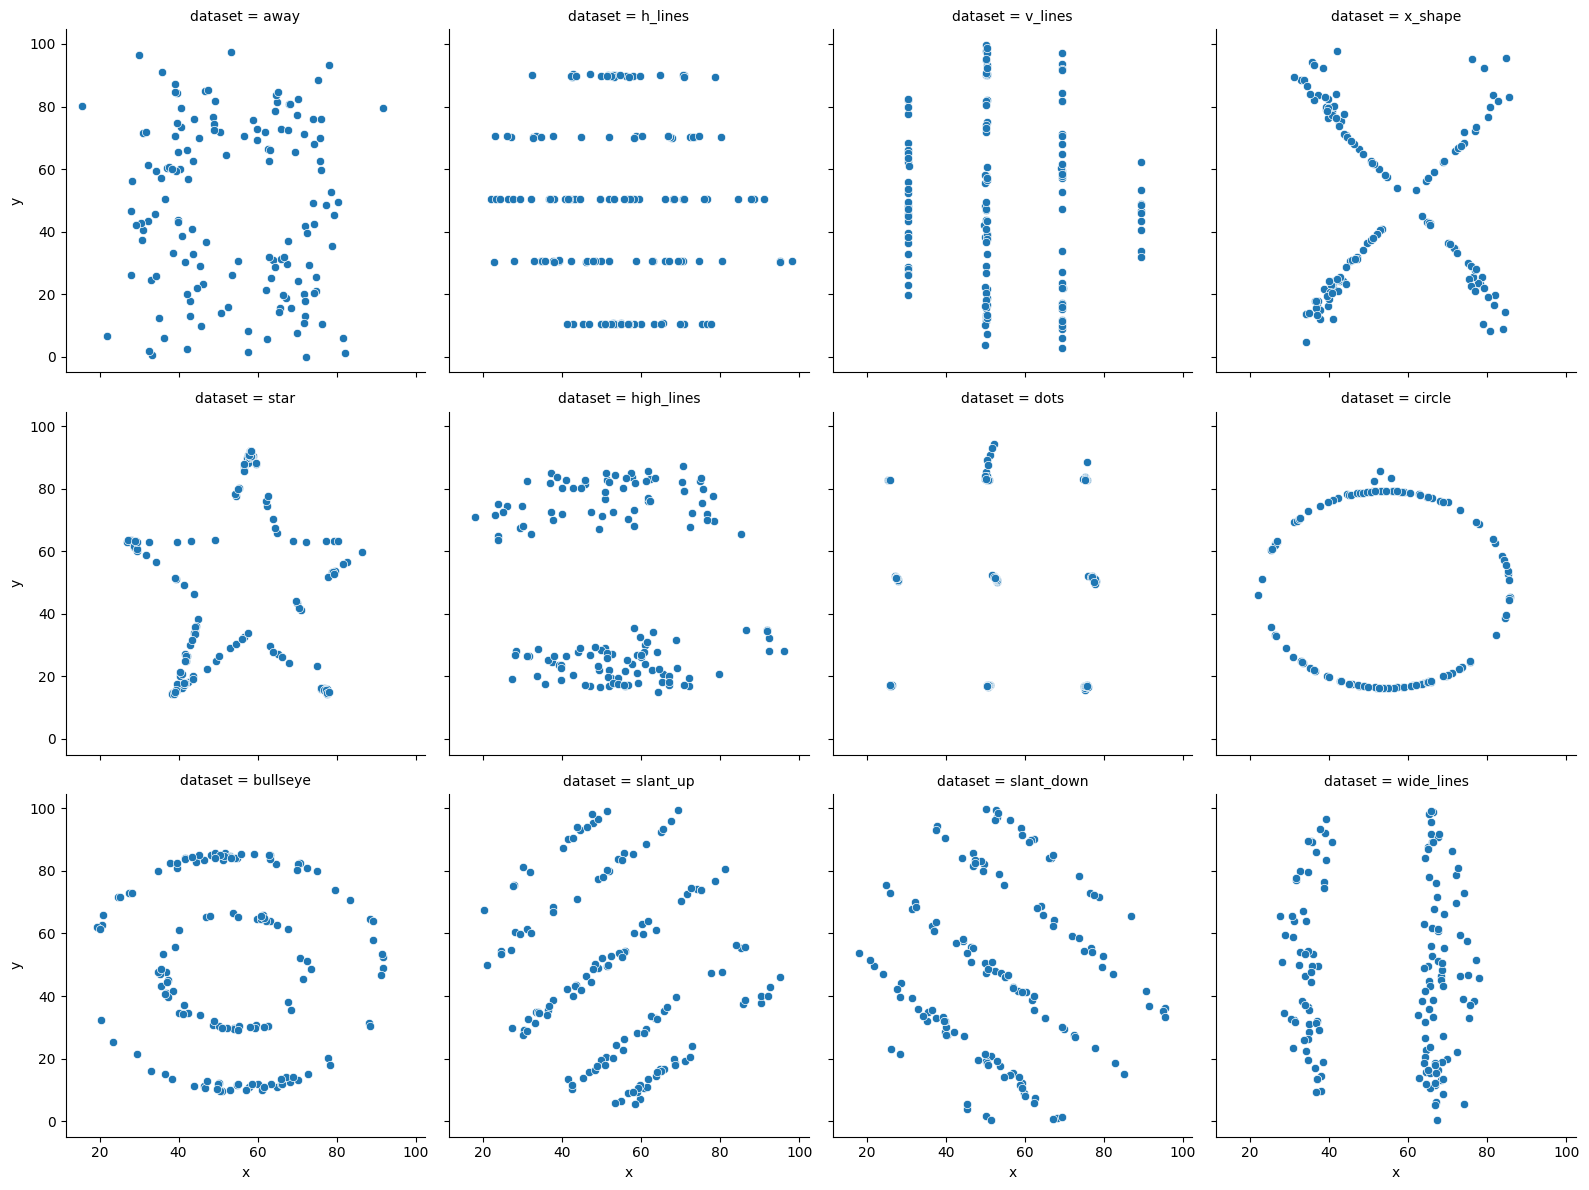

In [607]:
import seaborn as sns
df_without_mystery = df.loc[~df.index.isin(["mystery"])]

# pandas-only:
#df_without_mystery.groupby("dataset").plot(x="x", y="y", subplots=True, layout=(3, 4),sharex=True, sharey=True, kind="scatter")
# Seaborn:
sns.relplot(kind='scatter', data=df_without_mystery, x='x', y='y', col='dataset', col_wrap=4, height=4)
plt.show()

Die Datensätze unterscheiden sich erheblich. 

(7) Nehmen Sie sich die Folien zur heutigen Vorlesung zur Hand: Benennen Sie nun den Datensatz aus der Vorlesung, bei dem Sie ein ähnliches Phänomen beobachtet haben. (2 Worte)

Die 1971 vom englischen Statistiker Francis Anscombe erzeugten Daten, welche unter dem Namen _Anscombes Quartett_ bekannt sind, unterscheiden sich ebenfalls kaum in ihren Summary Statistics, weisen aber große Unterschiede bei ihrer Visualisierung auf.   

(8) Visualisieren Sie nun den Datensatz **mystery** in einem Scatter-Plot.

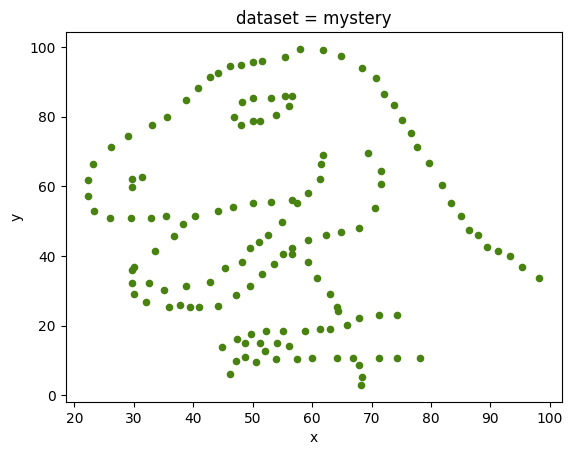

In [608]:
df[df.index == "mystery"].plot(x="x", y="y", kind="scatter", c=["#488211"], title="dataset = mystery")
plt.show()

Damit darf ich Ihnen gratulieren. Sie haben gerade einen bekannten Datensatz kennengelernt.

Herzlichen Glückwunsch. Sie haben soeben den "DataSaurus" entdeckt. Dieses Geschöpf stammt ursprünglich von Alberto Cairo, der an der University of Miami _Visuellen Journalismus_ lehrt, und tauchte zum ersten Mal in einem Tweet von Cairo auf: https://twitter.com/albertocairo/status/765167969139765250/photo/1

Seine Message ist klar: **Don't trust summary statistics. Always visualize your data first.**

Der DataSaurus hat es inzwischen zu kleiner Berühmtheit erlangt. Hinter dem nachfolgenden Link können Sie sehen, wie der Datensatz, den Sie gerade analysiert haben, entstanden ist: https://www.autodeskresearch.com/publications/samestats

### 3.2 Visualisierung Teil 1 (Weltgesundheit)

Die Visualisierung von Daten gehört zu den Tätigkeiten, die Sie als Data Scientist sehr häufig ausführen werden. Das Erstellen aussagekräftiger Abbildungen ist zeitintensiv, wird Ihnen aber mit wachsender Übung immer leichter fallen.

In dieser Übung werden Sie einen Datensatz visualisieren und interpretieren, der in den letzten Jahren oft diskutiert wurde. Sie werden untersuchen, wie es um die Gesundheit und den Wohlstand der Weltbevölkerung (zurzeit etwa 7,6 Milliarden Menschen) steht. Die Daten stammen aus unterschiedlichen Quellen und wurden von der gemeinnützigen Gapminder-Stiftung zusammengeführt, die es sich zum Ziel gemacht hat, Menschen mit Statistiken über den Zustand der Welt aufzuklären.

**Ihre Aufgaben**

(1) Führen Sie die unten angeführte Code-Zelle aus, um die Daten zu importieren.

In [609]:
!pip install gapminder
from gapminder import gapminder
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.80,8425333,779.45
1,Afghanistan,Asia,1957,30.33,9240934,820.85
2,Afghanistan,Asia,1962,32.00,10267083,853.10
3,Afghanistan,Asia,1967,34.02,11537966,836.20
4,Afghanistan,Asia,1972,36.09,13079460,739.98


(2) Welche Spalten sind in Ihrem Datensatz enthalten? (kurze Liste der Spalten)

Enthalten sind die Spalten `country`, `continent`, `year`, `lifeExp`, `pop`, `gdpPercap`.

(3) Machen Sie eine Kurzrecherche und klären Sie für sich: Was ist "GDP"? Was bedeutet "per capita"? (1-2 Sätze)

→ `gdpPercap` ist das inflationsbereinigte Bruttoinlandsprodukt pro Einwohner, welches in PPP Doller angegeben ist.

Aus der Gapminder Dokumentation heißt es dazu:

> GDP per capita in constant PPP dollars
> 
> GDP per capita measures the value of everything produced in a country during a year, divided by the number of people. The unit is constant dollars adjusted for inflation in 2017’s prices. As the cost of living varies across countries, we use a currency called “international dollars”, which is adjusted for Purchasing Power Parity (PPP). This is a virtual currency that enables better comparisons. Such a dollar would buy in each country a comparable amount of goods and services as a U.S. dollar would buy in the United States. GDP per capita is the GDP divided by the population of the country, which gives a rough estimate of the average annual income of the citizens.
> 
> [Gapminder Documentation](https://www.gapminder.org/data/documentation/gd001/) 

(4) Erstellen Sie eine Abbildung (Scatter-Plot), auf der Sie die Lebenserwartung (y-Achse) gegen GDP per capita (x-Achse) für jedes Land auftragen - *und zwar für das im Datensatz enthaltene neueste Jahr*. Skalieren Sie die x-Achse logarithmisch. Skalieren Sie die Größe der Punkte proportional zur Population des Landes.

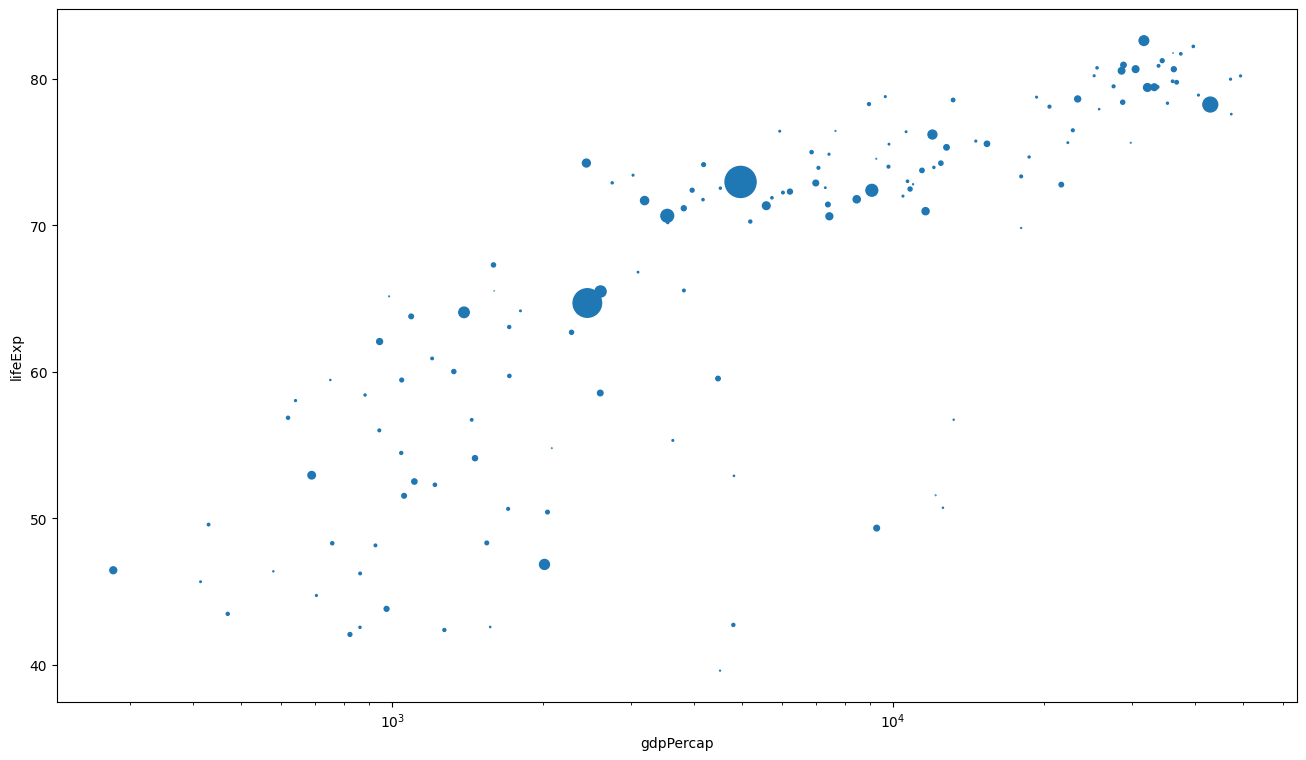

In [610]:
df_1: pd.DataFrame = gapminder.sort_values("year", ascending=False).groupby("country").first()

# Normalisieren
df_1["pop_norm"] = df_1["pop"] / df_1["pop"].max()

df_1.plot.scatter(x="gdpPercap", y="lifeExp", s=df_1["pop_norm"] * 500, logx=True, figsize=(16, 9))
plt.show()

(5) Interpretieren Sie Ihre Abbildung. Sehen Sie Zusammenhänge zwischen Lebenserwartung und GDP per Capita? (1-2 Sätze)

Bis auf wenige Ausreißer, bei denen trotz hohem GDP per Capita eine Lebenserwartung von < 60 Jahren vorliegt, scheint eine exponentielle Korrelation vorzuliegen. Je höher das GDP per Capita, desto höher auch die Lebenserwartung.  

(6) Erweitern Sie Ihre Abbildung aus Schritt (4), in dem Sie die Informationen über die Kontinente integrieren: Identifizieren Sie zunächst die Kontinente, die im Datensatz angeführt werden. Färben Sie die Punkte der Länder gemäß Ihrer Kontinentzugehörigkeit ein.

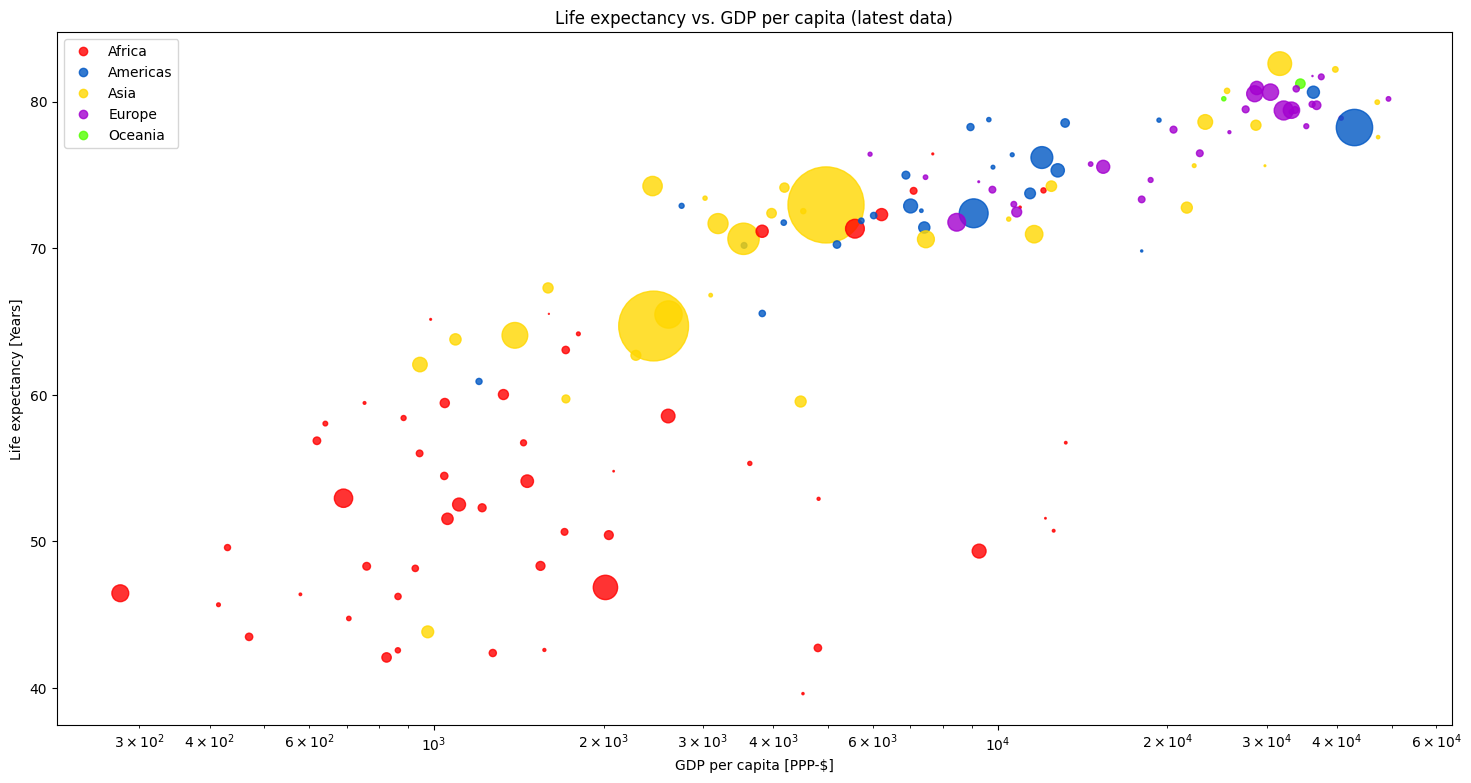

In [611]:
from matplotlib.ticker import LogFormatterSciNotation
fig, ax = plt.subplots(figsize=(18, 9))
labels, index = np.unique(df_1["continent"], return_inverse=True)
sc = ax.scatter(df_1["gdpPercap"], df_1["lifeExp"], marker='o', s=df_1["pop_norm"] * 3000, c=index, cmap="prism", alpha=0.8)
ax.legend(sc.legend_elements()[0], labels)
plt.title("Life expectancy vs. GDP per capita (latest data)")
plt.xscale("log")
plt.xlabel("GDP per capita [PPP-$]")
plt.ylabel("Life expectancy [Years]")
plt.tick_params(axis='x', which='minor')
ax.xaxis.set_minor_formatter(LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(10, 2)))
plt.show()

(7) Interpretieren Sie Ihre Abbildung aus Schritt (6). Gibt es Tendenzen bezüglich der Kontinentzugehörigkeit der Länder? Falls ja, welche? (1-3 Sätze).

Es sind einige Tendenzen zu erkennen, so haben die Länder auf dem afrikanischen Kontinent viel häufiger eine geringere Lebenserwartung und einen viel geringeren GDP per Capita.   

(8) Erzeugen Sie eine neue Abbildung, die dieselben Informationen wie Ihre Abbildung in Schritt (6) zeigt, nur aus dem Jahr 1967. Vergleichen Sie diese Abbildung mit der aus Schritt (6). Was hat sich verändert und wie interpretieren Sie dies? (1-3 Sätze)

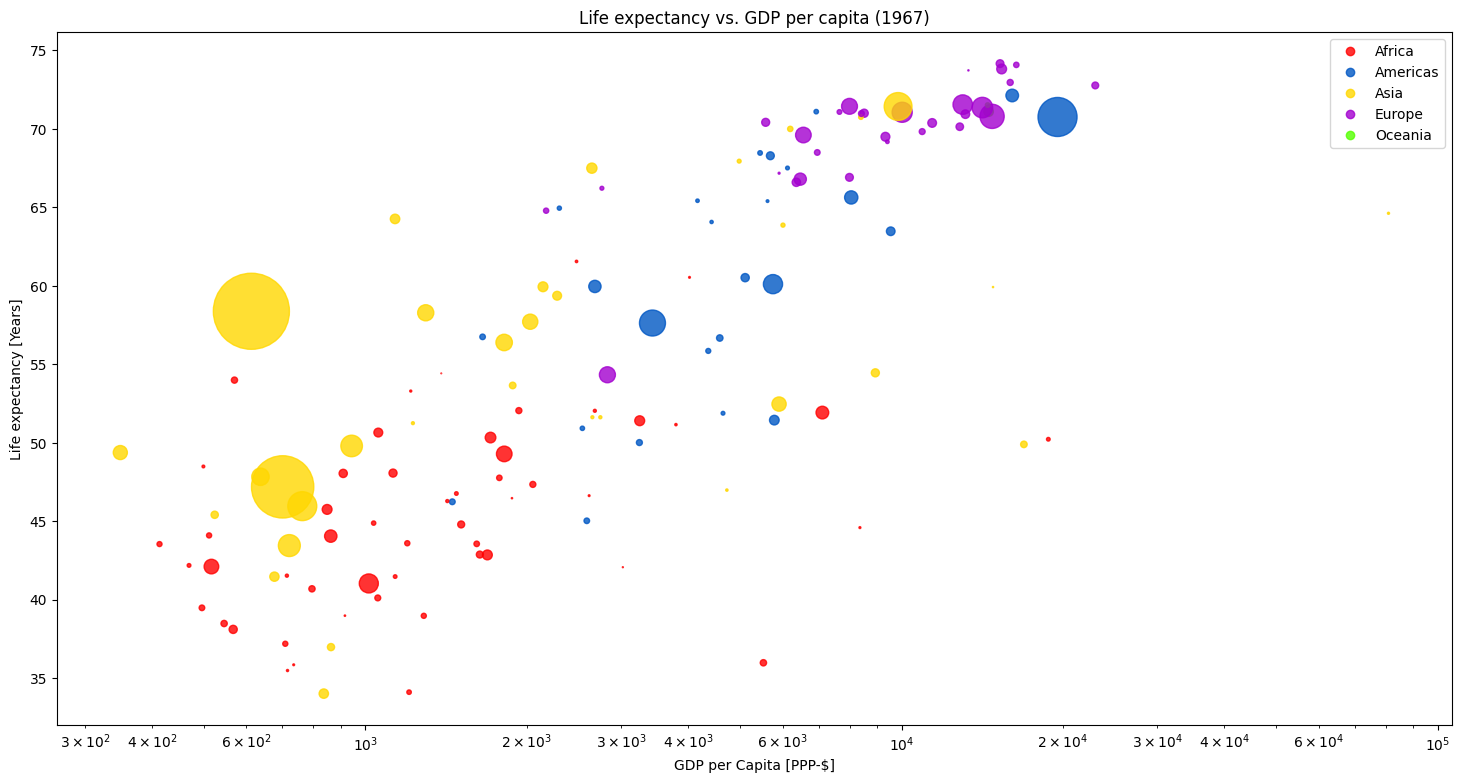

In [612]:
df_2: pd.DataFrame = gapminder[gapminder["year"] == 1967].copy()
df_2["pop_norm"] = df_2["pop"] / df_2["pop"].max()

fig, ax = plt.subplots(figsize=(18, 9))
labels, index = np.unique(df_2["continent"], return_inverse=True)
sc = ax.scatter(df_2["gdpPercap"], df_2["lifeExp"], marker='o', s=df_2["pop_norm"] * 3000, c=index, cmap="prism", alpha=0.8)
ax.legend(sc.legend_elements()[0], labels)
plt.title("Life expectancy vs. GDP per capita (1967)")
plt.xscale("log")
plt.xlabel("GDP per Capita [PPP-$]")
plt.ylabel("Life expectancy [Years]")
plt.tick_params(axis='x', which='minor')
ax.xaxis.set_minor_formatter(LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(10, 2)))
plt.show()

Die Lebenserwartung einiger Länder, besonders in Asien, ist hochgegangen, während ihr pro Kopfeinkommen ebenfalls gestiegen ist.

(9) \[Optional\] Machen Sie Ihre Abbildung interaktiv. Nutzen Sie die `interact` Funktion, um eine Abbildung zu erzeugen, in der Sie mithilfe eines Reglers das Jahr einstellen können, für das die Abbildung erzeugt werden soll. Wie verändern sich Lebenserwartung und GDP per Capita über die Jahre hinweg? (1-3 Sätze)

* Hinweis: Um diese Teilaufgabe umzusetzen, recherchieren Sie im Netz und lesen Sie unter anderem [hier](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html) nach, wie Sie `interact` nutzen können.

In [633]:
from functools import cache
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

years = np.unique(gapminder["year"])

def plot_year(year):
    df_3: pd.DataFrame = gapminder[gapminder["year"] == year].copy()
    df_3["pop_norm"] = df_3["pop"] / df_3["pop"].max()
    fig, ax = plt.subplots(figsize=(14, 6))
    labels, index = np.unique(df_3["continent"], return_inverse=True)
    sc = ax.scatter(df_3["gdpPercap"], df_3["lifeExp"], marker='o', s=df_3["pop_norm"] * 3000, c=index, cmap="prism", alpha=0.8)
    ax.legend(sc.legend_elements()[0], labels, loc="lower right")
    plt.title(f"Life expectancy vs. GDP per capita ({year})")
    plt.xscale("log")
    plt.xlabel("GDP per Capita [PPP-$]")
    plt.ylabel("Life expectancy [Years]")
    plt.xlim((3e2, 6e4))
    plt.ylim((25, 90))
    plt.tick_params(axis='x', which='minor')
    ax.xaxis.set_minor_formatter(LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(10, 1)))
    plt.show()

interact(plot_year, year=widgets.IntSlider(min=1952, max=2007, step=5))

interactive(children=(IntSlider(value=1952, description='year', max=2007, min=1952, step=5), Output()), _dom_c…

<function __main__.plot_year(year)>

### 3.3 Visualisierung Teil 2 (Geburtenraten)

In dieser Aufgabe werden Sie Ihre Fähigkeiten, Daten zu visualisieren, weiter verfeinern. Wir werden uns wieder Daten der Gapminder Stiftung anschauen.

* Da diese Übung an die obere Übung anschließt, gehe ich davon aus, dass Sie nun vertrauter mit der Visualisierung von Daten sind. Daher sind die Anweisungen in dieser Übungsaufgabe etwas freier gehalten.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/child_mortality_0_5_year_olds_dying_per_1000_born.csv) (Datensatz 1) und [hier](https://data.bialonski.de/ds/children_per_woman_total_fertility.csv) (Datensatz 2).

**Randbemerkung**

Im Rahmen dieser Aufgabe wollen wir unter dem Begriff "Geburtenrate" die Gesamtfertilitätsrate (*total fertility rate*) verstehen, wie Sie sie direkt im "Datensatz 2" angegeben finden. Dies ist die durchschnittliche Anzahl von Kindern, die eine gebärfähige Person im Laufe ihres Lebens bekommt. Die Forschung [unterscheidet](https://web.archive.org/web/20220502150023/https://www.gbe-bund.de/gbe/abrechnung.prc_abr_test_logon?p_uid=gast&p_aid=0&p_knoten=FID&p_sprache=D&p_suchstring=12693) allerdings zwischen verschiedenen Fertilitätsindikatoren (z.B. zwischen sogenannten Geburtenziffern, Fertilitätsraten und Reproduktionsraten). Falls Sie also einmal mit einem Bevölkerungswissenschaftler sprechen sollten: Sie untersuchen hier im Rahmen dieser Aufgabe die Gesamtfertilitätsrate.

**Ihre Aufgaben**

(1) Importieren Sie die oben aufgeführten Datensätze.

In [614]:
df_4 = pd.read_csv("child_mortality_0_5_year_olds_dying_per_1000_born.csv")
df_5 = pd.read_csv("children_per_woman_total_fertility.csv")

(2) Interpretieren Sie die Dateinamen und schauen Sie in die Datensätze: Was enthalten Ihre Datensätze für Daten?

In [615]:
print(df_4.columns, df_4.shape)
print(df_5.columns, df_5.shape)

Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'],
      dtype='object', length=220) (193, 220)
Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'],
      dtype='object', length=220) (184, 220)


Die Datensätze enthalten für 193 respektive 184 Länder Zahlen zu der Kindersterblichkeit in den Jahren von 1800 bis 2018. Dabei scheint der erste Datensatz die Sterblichkeit von Kindern vor dem 5. Lebensjahr pro 1.000 (lebend) Geburten zu enthalten und der zweite Datensatz die Gesamtfertilitätsrate. _(The number of children that would be born to each woman with precailing age-specific fertility rates.)_

(3) Erstellen Sie die erste Abbildung: Tragen Sie in einem Scatter-Plot die Kind-Überlebensrate (in Prozent) (y-Achse) gegen die Kinder pro gebärfähiger Person (x-Achse) für jedes aufgeführte Land für das Jahr 1962 ein.

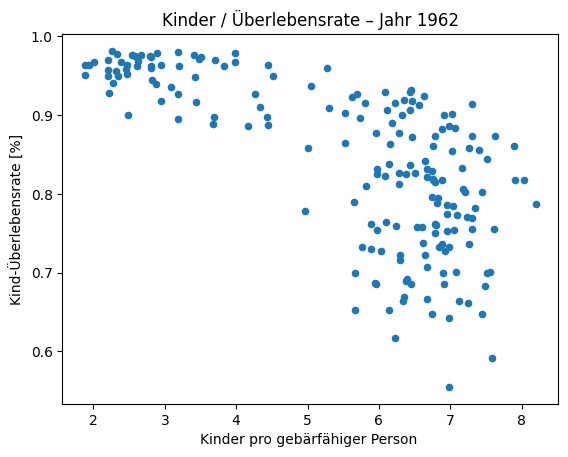

In [616]:
df = df_4[df_4["1962"].notna()][["country", "1962"]].set_index("country").join(df_5[df_5["1962"].notna()][["country", "1962"]].set_index("country"), lsuffix="_mort", rsuffix="_fert")

# Überlebensrate in Prozent = 1 - Sterberate in Prozent
df["1962_surv"] = 1 - (df["1962_mort"] / 1000)
df.plot(x="1962_fert", y="1962_surv", kind="scatter")
plt.title("Kinder / Überlebensrate – Jahr 1962")
plt.xlabel("Kinder pro gebärfähiger Person ")
plt.ylabel("Kind-Überlebensrate [%]")
plt.show()

(4) Erweitern Sie die Abbildung aus Schritt (3), indem Sie die Punkte des Scatterplots proportional zur Populationsgröße des jeweiligen Landes skalieren. Dazu werden Sie Informationen aus Übung 3.2 verwenden müssen.

Es wurden zu den 186 Ländern aus dem Kinder-Geburten/Sterberaten-Datensatz nur 134 Populationsgrößen aus dem Gapminder Datensatz zugeordnet.


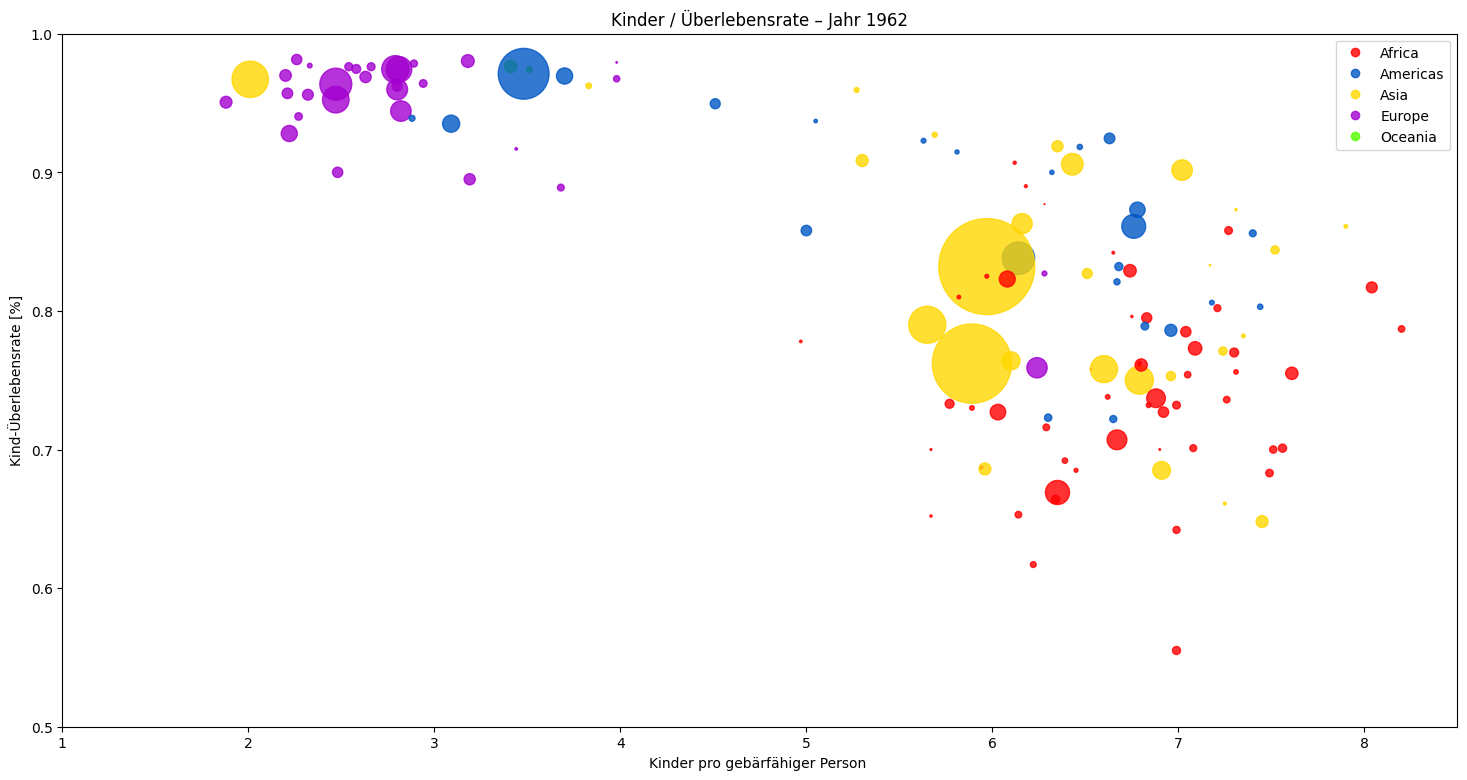

In [617]:
def show_for_year(year, df_4, df_5):
    df = df_4[df_4[year].notna()][["country", year]].set_index("country").join(df_5[df_5[year].notna()][["country", year]].set_index("country"), lsuffix="_mort", rsuffix="_fert")

    df[f"{year}_surv"] = 1 - (df[f"{year}_mort"] / 1000)

    df_5: pd.DataFrame = gapminder[gapminder["year"] == int(year)].copy()
    df_5["pop_norm"] = df_5["pop"] / df_5["pop"].std()
    
    df_6 = df.join(df_5.set_index("country"))
    df_7 = df_6[~df_6["lifeExp"].isna()]
    
    print(f"Es wurden zu den {df.shape[0]} Ländern aus dem Kinder-Geburten/Sterberaten-Datensatz nur {df_7.shape[0]} Populationsgrößen aus dem Gapminder Datensatz zugeordnet.")
    
    fig, ax = plt.subplots(figsize=(18, 9))
    labels, index = np.unique(df_7["continent"], return_inverse=True)
    sc = ax.scatter(df_7[f"{year}_fert"], df_7[f"{year}_surv"], marker='o', s=df_7["pop_norm"] * 500, c=index, cmap="prism", alpha=0.8)
    ax.legend(sc.legend_elements()[0], labels)
    plt.title(f"Kinder / Überlebensrate – Jahr {year}")
    plt.xlabel("Kinder pro gebärfähiger Person ")
    plt.ylabel("Kind-Überlebensrate [%]")
    plt.ylim((0.5, 1))
    plt.xlim((1, 8.5))
    plt.show()

show_for_year("1962", df_4, df_5)

(5) Interpretieren Sie die Abbildung aus Schritt (4). Können Sie verschiedene Cluster von Ländern erkennen? (1-5 Sätze)

Es lassen sich zwei Cluster ausmachen. Das eine ist im Bereich von 2-4 Kindern pro Person mit Überlebensraten von über 90% und das andere Cluster liegt im Bereich von 5.5-8 Kindern pro Person, wobei die Überlebensraten hier zwischen 60 und 90% verteilt sind.

(6) Erstellen Sie eine weitere Abbildung wie in Schritt (4), allerdings für das Jahr 2007.

Es wurden zu den 193 Ländern aus dem Kinder-Geburten/Sterberaten-Datensatz nur 134 Populationsgrößen aus dem Gapminder Datensatz zugeordnet.


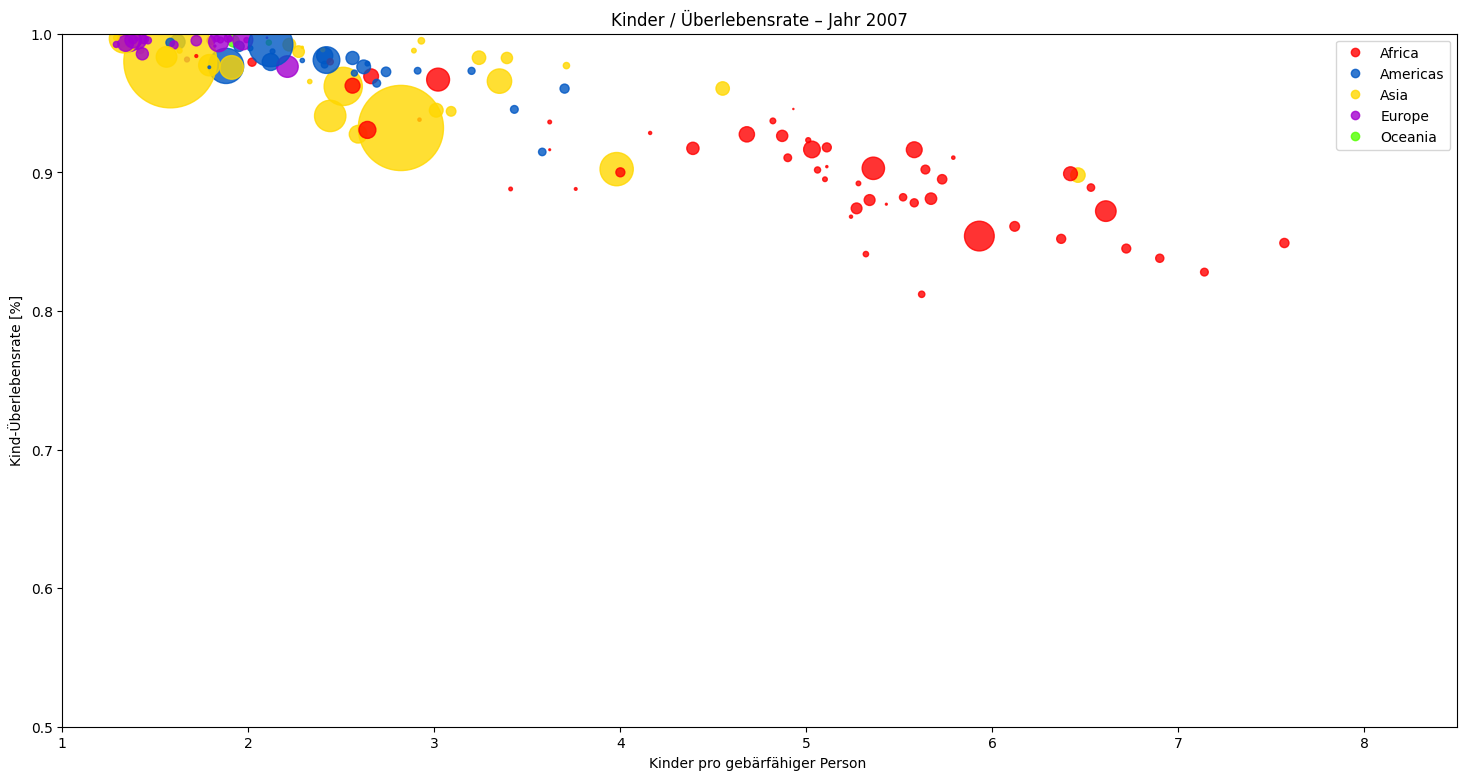

In [618]:
show_for_year("2007", df_4, df_5)

(7) Vergleichen Sie Ihre Abbildungen aus Schritt (4) und Schritt (6): Wie haben sich die Daten verändert? Können Sie für das Jahr 2007 weiterhin Cluster erkennen? (1-5 Sätze)

Im Bereich von 1,2 bis 2,5 Kindern pro Person gibt es ein Cluster bei einer Überlebensrate von über 97 %. Insgesamt ist sowohl die Kindersterblichkeit, als auch die Geburtenrate, bei den meisten Ländern stark gesunken. Die Überlebensrate ist 2007 in jedem Land über 85 %, was ein großer Fortschritt im Vergleich zu 1962 ist, jedoch lässt sich auch eine Separation der Länder Afrikas feststellen, bei denen die Überlebensraten zwar auch gestiegen und die Geburtenraten gesunken sind, aber bei weitem nicht im gleichen Maße wie auf anderen Kontinenten.    

(8) Ziehen Sie ein Fazit: Beschreiben Sie in wenigen Sätzen, was Sie aus den beiden Abbildungen lernen.

Je kleiner die Kindersterblichkeit ist, desto geringer wird mit einem zeitlichen Versatz auch die Geburtenrate.

### 3.4 Visualisierung Teil 3

Sie haben in den letzten beiden Aufgaben Daten der Gapminder Stiftung visualisiert. In dieser Aufgabe geht es darum, Daten selbstständig zu analysieren, zu visualisieren und Ihre Erkenntnisse aufzubereiten.

**Ihre Aufgaben**

(1) Sofern noch nicht geschehen: Tun Sie sich mit einem Kollegen/einer Kollegin zusammen.

(2) Testen Sie Ihr Vorwissen: Absolvieren Sie gemeinsam den Test der Gapminder-Stiftung, der [hier](https://upgrader.gapminder.org/t/2017-gapminder-test) hinterlegt ist. Wie viele der Fragen konnten Sie richtig beantworten?

![10 von 13 Fragen](quizz.png)

(3) Stöbern Sie gemeinsam in den Datenquellen der Gapminder Stiftung unter [https://www.gapminder.org/data/](https://www.gapminder.org/data/). (Scrollen Sie auf der verlinkten Seite weiter nach unten, um die Datensammlung zu sehen: "List of indicators in Gapminder Tools").

(4) Identifizieren Sie Datensätze, die Sie interessant finden. Führen Sie eine explorative Analyse durch, d.h. laden und importieren Sie die Daten, stellen Sie Fragen auf, und erstellen Sie entsprechende Visualisierungen, interpretieren Sie Ihre Befunde.

In [619]:
# Suicide woman/men per 100_000 people
# https://www.who.int/violence_injury_prevention/en/
suicides_men = pd.read_csv("suicide_men_per_100000_people.csv")
suicides_women = pd.read_csv("suicide_women_per_100000_people.csv")

# Individuals using the Internet (% of population)
# https://data.worldbank.org/indicator/IT.NET.USER.ZS
internet_users = pd.read_csv("internet_users.csv")

In [620]:
print(suicides_men.isnull().sum().values)
print(suicides_women.isnull().sum().values)

[  0 108 101  98  97  96  87  87  86  84  84  82  78  80  76  78  80  79
  74  74  73  76  74  75  74  74  73  73  74  71  71  65  56  52  65  62
  40  47  47  50  52  49  55  53  52  52  55  61  62  61  62  63  63  65
  68  68  69  73  66  65  67  68  63  67  68  68  78 104]
[  0 101  94  91  90  89  80  80  79  78  77  76  73  74  70  72  73  72
  69  67  68  70  69  68  69  70  68  69  68  67  68  63  51  48  59  57
  38  41  42  43  45  44  49  46  46  46  49  54  55  54  56  57  56  58
  61  61  63  66  59  58  60  61  59  61  61  62  71  97]


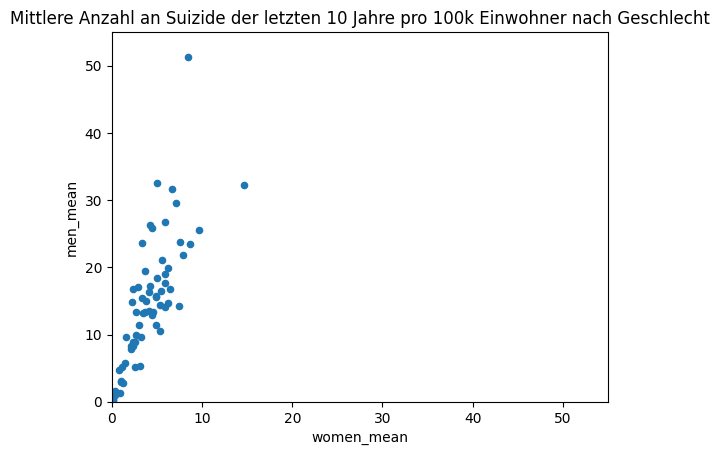

In [621]:
women_mean = suicides_women.set_index("country").loc[:, "2005":"2015"].mean(axis=1, skipna=True).dropna()
men_mean = suicides_men.set_index("country").loc[:, "2005":"2015"].mean(axis=1, skipna=True).dropna()

suicides = pd.concat([women_mean.rename("women_mean"), men_mean.rename("men_mean")], axis="columns", join="inner")
suicides.plot(x="women_mean", y="men_mean", kind="scatter")
plt.title("Mittlere Anzahl an Suizide der letzten 10 Jahre pro 100k Einwohner nach Geschlecht")
plt.xlim((0, 55))
plt.ylim((0, 55))
plt.show()

In [622]:
internet_users_max = internet_users.set_index("country").loc[:, "2005":"2015"].max(axis=1).dropna()

In [623]:
internet_users_max.name = "max_internet_users_percent"

In [624]:
suicides = suicides.join(internet_users_max)

In [625]:
suicides["suicides_per_100k"] = suicides["women_mean"] + suicides["men_mean"]

In [626]:
suicides

,women_mean,men_mean,max_internet_users_percent,suicides_per_100k
country,,,,
Albania,3.08,5.30,56.90,8.38
Armenia,0.99,3.06,59.10,4.06
Australia,4.87,15.54,84.60,20.41
Austria,5.01,18.40,83.90,23.41
Azerbaijan,0.29,1.06,77.00,1.35
...,...,...,...,...
Tunisia,0.12,0.26,46.50,0.38
Turkey,0.96,2.88,53.70,3.84
USA,4.15,16.30,75.00,20.45


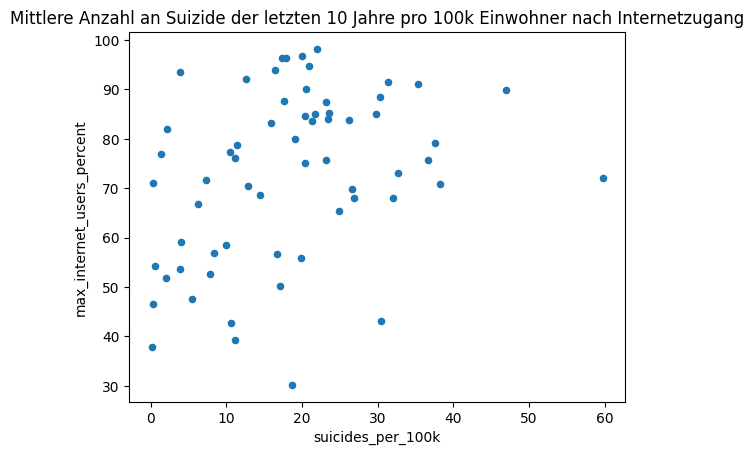

In [627]:
suicides.plot(x="suicides_per_100k", y="max_internet_users_percent", kind="scatter")
plt.title("Mittlere Anzahl an Suizide der letzten 10 Jahre pro 100k Einwohner nach Internetzugang")
plt.show()